<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Проверяем-данные" data-toc-modified-id="Проверяем-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Проверяем данные</a></span></li><li><span><a href="#Строим-график-распределения-числа-показов-(Impressions-–-сколько-раз-пользователи-увидели-данное-объявление)-для-каждой-рекламной-кампании-в-Facebook,-прологарифмировав-значения" data-toc-modified-id="Строим-график-распределения-числа-показов-(Impressions-–-сколько-раз-пользователи-увидели-данное-объявление)-для-каждой-рекламной-кампании-в-Facebook,-прологарифмировав-значения-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Строим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения</a></span></li></ul></div>

In [173]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr #функция iqr из scipy

In [174]:
df = pd.read_csv('conversion.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


Описание данных

ad_id – идентификатор объявления (рекламы)

xyz_campaign_id – идентификатор рекламной кампании в базе компании X

fb_campaign_id – идентификатор кампании в Facebook

age – возрастная группа, которой показывалась реклама

gender – пол тех, кому показывалась реклама

interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)

impressions – число показов

clicks – число кликов

spent – сумма, которую компания потратила на показ объявления 

total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы

approved_conversion – количество людей, которые купили продукт после просмотра рекламы

### Проверяем данные ###

In [175]:
df.shape

(1143, 11)

In [176]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [178]:
df.xyz_campaign_id.nunique()

3

### Строим график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения ###

In [179]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [180]:
ax = df.groupby('fb_campaign_id', as_index = False)['Impressions'].sum()

ax['log_impressions'] = np.log(ax['Impressions'])
ax.head()

,fb_campaign_id,Impressions,log_impressions
0,103916,7350,8.902456
1,103917,17861,9.790375
2,103920,693,6.541030
3,103928,8392,9.035034
4,103929,1915,7.557473


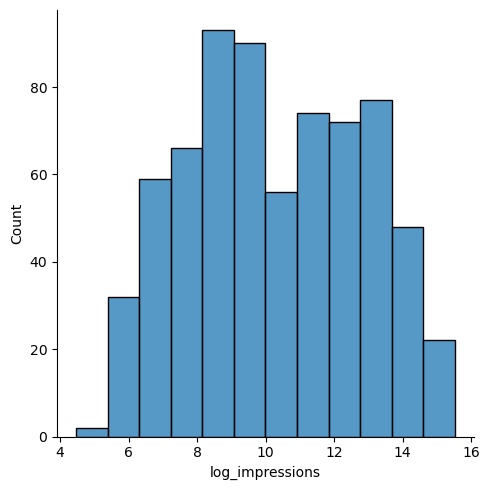

In [181]:
sns.displot(data = ax, x = 'log_impressions')

plt.show()

**CTR (click-through rate) - отношение числа кликов к количеству показов**

In [182]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [183]:
df['ctr'] = df.Clicks / df.Impressions

In [184]:
df.loc[df['ctr'].idxmax(),'ad_id'] # ad_id объявления с наибольшим CTR

738637

**Визуализируем CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id) == 916**

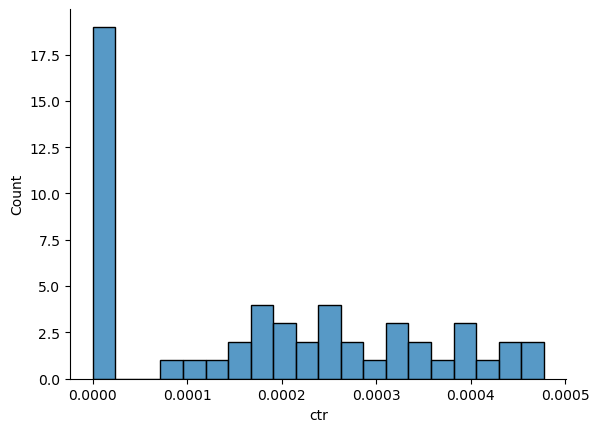

In [185]:
ax_2 = df.query('xyz_campaign_id == 916')
sns.histplot(data = ax_2, x = 'ctr', bins = 20)
sns.despine() #уберет лишние надписи рядом с графиком
plt.show()

**CPC (cost-per-click) – стоимость за клик пользователя по объявлению**

**CPC =  spent / clicks**

In [186]:
df['cpc'] = df.Spent / df.Clicks
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [187]:
df_dropna = df.dropna()

In [188]:
df_dropna.cpc.describe() 

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [189]:
sns.histplot(data = df_dropna, x = 'cpc')
sns.despine()

In [190]:
iqr(df.cpc, nan_policy='omit') #считаем межквартильный размах, игнорируя значения Nan в столбце cpc

0.2543636990499998

In [191]:
#можно перепроверить значение мжкартильного размаха: из 75 квартиля вычитаем 25 квартиль
#1.644364 - 1.390000

**Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления**

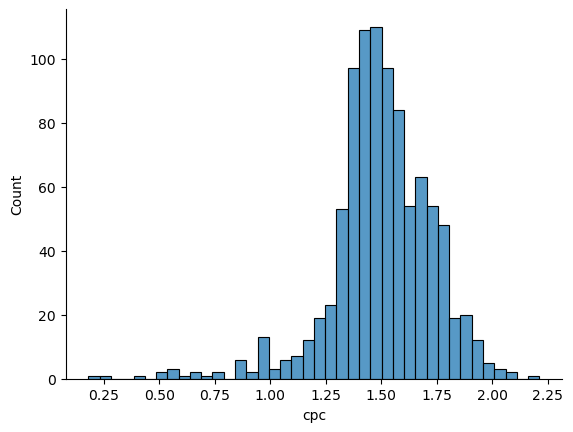

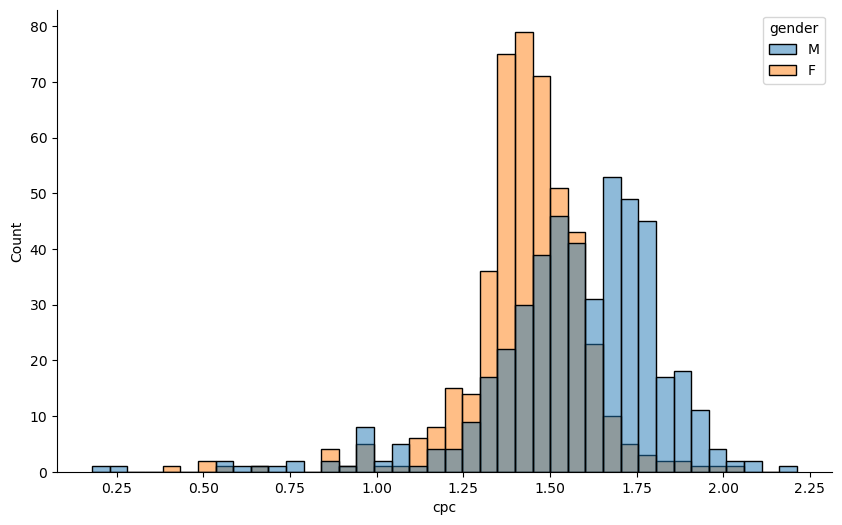

In [192]:
plt.figure(figsize=(10, 6)) #размер графика
sns.histplot(data = df_dropna, x = 'cpc', hue = 'gender')
sns.despine()
plt.show()

C:\Users\1612918\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\1612918\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


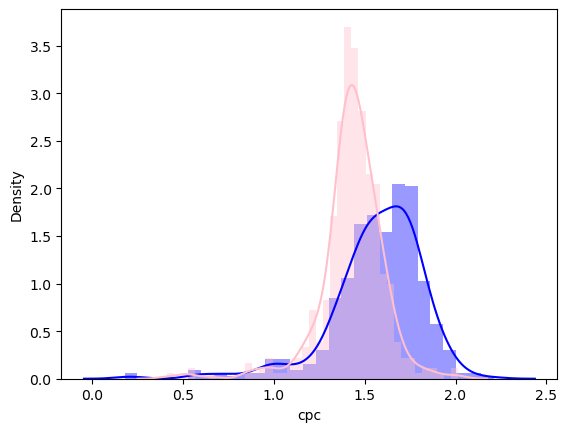

In [193]:
# вариант графика
# male
sns.distplot(df[df['gender'] == 'M']['cpc'], 
             hist=True, 
             kde=True, 
             label='Мужчины', 
             color='blue')

# female
sns.distplot(df[df['gender'] == 'F']['cpc'], 
             hist=True, 
             kde=True, 
             label='Женщины', 
             color='pink')

plt.show()

**Считаем конверсию из клика в покупку**

клики – Clicks, покупки – Approved_Conversion

In [194]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [195]:
df['convercion'] = df['Approved_Conversion'] / df['Clicks'] * 100
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,convercion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,100.0
